In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[5, 12], [4, 11], [6, 14], [2, 5], [3, 7], [4, 10], [7, 13], [1, 3], [2, 4], [6, 12], [1, 4]])
data

array([[ 5, 12],
       [ 4, 11],
       [ 6, 14],
       [ 2,  5],
       [ 3,  7],
       [ 4, 10],
       [ 7, 13],
       [ 1,  3],
       [ 2,  4],
       [ 6, 12],
       [ 1,  4]])

In [3]:
data.shape

(11, 2)

In [4]:
df = pd.DataFrame(data, columns =["Exp", "Sal"])

In [5]:
df.head()

,Exp,Sal
0,5,12
1,4,11
2,6,14
3,2,5
4,3,7


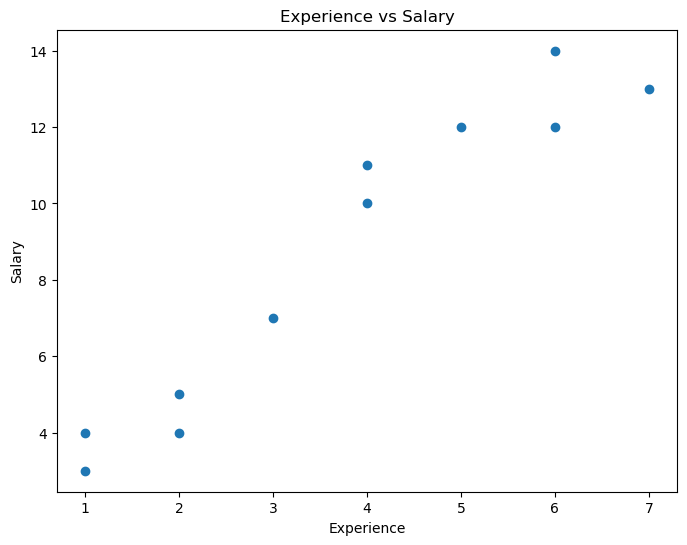

In [6]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.scatter(df["Exp"], df["Sal"])
plt.show()

In [7]:
# Considering 2 centroids
c1 = data[7]
c2 = data[2]
print("cent 1 -", c1, "\ncent 2 -",c2 )

cent 1 - [1 3] 
cent 2 - [ 6 14]


In [8]:
c1_ls = [np.sqrt(((c1[0] - data[i][0])**2) + ((c1[1] - data[i][1])**2)) for i in range(len(data))]

In [9]:
c1_ls

[9.848857801796104,
 8.54400374531753,
 12.083045973594572,
 2.23606797749979,
 4.47213595499958,
 7.615773105863909,
 11.661903789690601,
 0.0,
 1.4142135623730951,
 10.295630140987,
 1.0]

In [10]:
c2_ls = [np.sqrt(((c2[0] - data[i][0])**2) + ((c2[1] - data[i][1])**2)) for i in range(len(data))]
c2_ls

[2.23606797749979,
 3.605551275463989,
 0.0,
 9.848857801796104,
 7.615773105863909,
 4.47213595499958,
 1.4142135623730951,
 12.083045973594572,
 10.770329614269007,
 2.0,
 11.180339887498949]

In [11]:
new_df = df

In [12]:
new_df["cent1"] = c1_ls
new_df["cent2"] = c2_ls
new_df.head()

,Exp,Sal,cent1,cent2
0,5,12,9.848858,2.236068
1,4,11,8.544004,3.605551
2,6,14,12.083046,0.000000
3,2,5,2.236068,9.848858
4,3,7,4.472136,7.615773


In [13]:
gr = [np.argmin(df[["cent1","cent2"]].iloc[i]) for i in range(len(df))]

In [14]:
gr

[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]

In [15]:
new_df["cluster"] = gr
new_df

,Exp,Sal,cent1,cent2,cluster
0,5,12,9.848858,2.236068,1
1,4,11,8.544004,3.605551,1
2,6,14,12.083046,0.000000,1
3,2,5,2.236068,9.848858,0
4,3,7,4.472136,7.615773,0
5,4,10,7.615773,4.472136,1
6,7,13,11.661904,1.414214,1
7,1,3,0.000000,12.083046,0
8,2,4,1.414214,10.770330,0
9,6,12,10.295630,2.000000,1


In [16]:
c1_data = new_df[new_df["cluster"]==0]
c2_data = new_df[new_df["cluster"]==1]

In [17]:
c1_data

,Exp,Sal,cent1,cent2,cluster
3,2,5,2.236068,9.848858,0
4,3,7,4.472136,7.615773,0
7,1,3,0.000000,12.083046,0
8,2,4,1.414214,10.770330,0
10,1,4,1.000000,11.180340,0


In [18]:
c2_data

,Exp,Sal,cent1,cent2,cluster
0,5,12,9.848858,2.236068,1
1,4,11,8.544004,3.605551,1
2,6,14,12.083046,0.000000,1
5,4,10,7.615773,4.472136,1
6,7,13,11.661904,1.414214,1
9,6,12,10.295630,2.000000,1


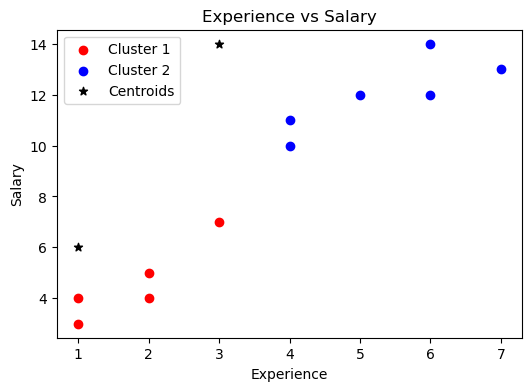

In [19]:
%matplotlib inline
plt.figure(figsize=(6,4))
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.scatter(c1_data["Exp"], c1_data["Sal"], label="Cluster 1", color="red")
plt.scatter(c2_data["Exp"], c2_data["Sal"], label="Cluster 2", color="blue")
plt.scatter(c1, c2, label="Centroids", marker="*", color="black")
plt.legend()
plt.show()

In [20]:
c1_data["Exp"].mean()

1.8

In [21]:
c2_data["Sal"].mean()

12.0

In [22]:
new_c1 = np.array([c1_data["Exp"].mean(), c1_data["Sal"].mean()])
new_c1

array([1.8, 4.6])

In [23]:
new_c2 = np.array([c2_data["Exp"].mean(), c2_data["Sal"].mean()])
new_c2

array([ 5.33333333, 12.        ])

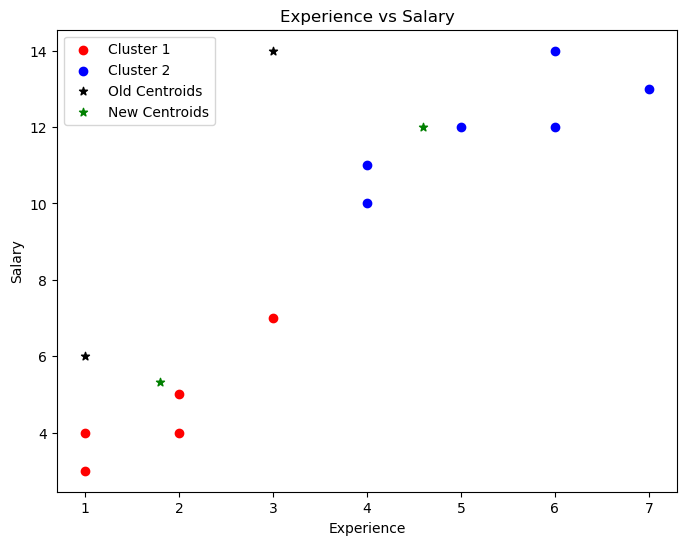

In [24]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.scatter(c1_data["Exp"], c1_data["Sal"], label="Cluster 1", color="red")
plt.scatter(c2_data["Exp"], c2_data["Sal"], label="Cluster 2", color="blue")
plt.scatter(c1, c2, label="Old Centroids", marker="*", color="black")
plt.scatter(new_c1, new_c2, label="New Centroids", marker="*", color="green")
plt.legend()
plt.show()